In the first part of this notebook (until the next Markdown), I mirror Feng's setup in baseline.ipynb for aggregating student data into single rows for each student (per module per presentation).

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Here I am using the local file name in the shared DSCB Dropbox folder

df = pd.read_csv('/Users/jamesemcnally/Dropbox/DSBC Student Risk Factors Datasets/Streaming_OULAD_dataset.csv')

In [4]:
df.sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score,final_result
412003,2.0,2.0,585709,1.0,7.0,2.0,4.0,0.0,0,90,...,0,0,4,0,1,0,2,0,NaN,2.0
918209,3.0,3.0,683653,0.0,3.0,2.0,9.0,0.0,0,60,...,0,0,0,0,0,0,0,0,NaN,2.0
809078,3.0,2.0,610931,0.0,6.0,2.0,6.0,0.0,0,60,...,0,0,0,0,4,0,5,0,NaN,3.0
272407,1.0,2.0,628178,1.0,1.0,3.0,6.0,1.0,0,60,...,0,0,0,0,0,0,0,3,NaN,3.0
1508729,5.0,3.0,407232,0.0,12.0,2.0,3.0,0.0,0,180,...,0,6,20,0,0,0,4,0,NaN,2.0


In [5]:
dfs = df.drop(['dataplus','date','score'], axis=1)
student_feats = ['gender','region','highest_education','imd_band','age_band',
                 'num_of_prev_attempts','studied_credits','final_result']
tag = ['id_student','code_module','code_presentation']
X1 = dfs.drop(student_feats,axis=1).groupby(tag).sum()
X2y = dfs[tag+student_feats].groupby(tag).mean()
dfc = pd.concat([X1,X2y],axis=1)

In [6]:
dfc

disability  dualpane  externalquiz  \
id_student code_module code_presentation                                       
6516       0.0         3.0                       0.0         0             0   
8462       3.0         1.0                       0.0         0            12   
                       3.0                       0.0         0             0   
11391      0.0         1.0                       0.0         0             0   
23629      1.0         0.0                       0.0         0             0   
...                                              ...       ...           ...   
2698257    0.0         1.0                       0.0         0             0   
2698535    2.0         2.0                       0.0         0             0   
           4.0         1.0                       0.0         2             0   
2698577    1.0         3.0                       0.0         0             0   
2698588    1.0         3.0                       0.0         0             0   

                                          folder  forumng  glossary  homepage  \
id_student code_module code_presentation                                        
6516       0.0         3.0                     0      451         0       497   
8462       3.0         1.0                     0       36         0       196   
                       3.0                     0        2         0         7   
11391      0.0         1.0                     0      193         0       138   
23629      1.0         0.0                     0       87         0        36   
...                                          ...      ...       ...       ...   
2698257    0.0         1.0                     0      201         0       165   
2698535    2.0         2.0                     0      309         0        98   
           4.0         1.0                     0     1953         0       391   
2698577    1.0         3.0                     0      103         0       204   
2698588    1.0         3.0                     0       67         0       171   

                                          htmlactivity  oucollaborate  \
id_student code_module code_presentation                                
6516       0.0         3.0                           0              0   
8462       3.0         1.0                           0             27   
                       3.0                           0              1   
11391      0.0         1.0                           0              0   
23629      1.0         0.0                           0              0   
...                                                ...            ...   
2698257    0.0         1.0                           0              0   
2698535    2.0         2.0                           0              0   
           4.0         1.0                           0              0   
2698577    1.0         3.0                           0              5   
2698588    1.0         3.0                           0              7   

                                          oucontent  ...  subpage  url  \
id_student code_module code_presentation             ...                 
6516       0.0         3.0                     1505  ...      143  143   
8462       3.0         1.0                       64  ...      230   23   
                       3.0                        0  ...        0    0   
11391      0.0         1.0                      553  ...       32    5   
23629      1.0         0.0                        0  ...        5    0   
...                                             ...  ...      ...  ...   
2698257    0.0         1.0                      331  ...       44    5   
2698535    2.0         2.0                        6  ...       52    6   
           4.0         1.0                      773  ...       13   90   
2698577    1.0         3.0                      253  ...       38    4   
2698588    1.0         3.0                      233  ...       76    2   

                                  

Next I am measuring correlation ratios for each of the features against the "final grade" column as the target as part of EDA.

In [7]:
def correlation_ratio(categories, values):
    """
    Calculate eta-squared: proportion of variance explained by categories
    """
    categories = np.array(categories)
    values = np.array(values)
    
    # Overall mean
    mean_total = np.mean(values)
    
    # Between-group variance
    ss_between = sum(len(values[categories == cat]) * 
                     (np.mean(values[categories == cat]) - mean_total)**2 
                     for cat in np.unique(categories))
    
    # Total variance
    ss_total = sum((values - mean_total)**2)
    
    return ss_between / ss_total if ss_total != 0 else 0

# Calculate for all numeric features
results = []
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'final_result':
        eta = correlation_ratio(df['final_result'], df[col])
        results.append({'feature': col, 'eta_squared': eta})

eta_df = pd.DataFrame(results).sort_values('eta_squared', ascending=False)
print(eta_df)

                 feature  eta_squared
5      highest_education     0.026956
11                  date     0.017741
6               imd_band     0.013386
8   num_of_prev_attempts     0.012313
9        studied_credits     0.007915
7               age_band     0.006110
1      code_presentation     0.005489
16               forumng     0.005096
10            disability     0.004769
21             oucontent     0.001794
2             id_student     0.001697
0            code_module     0.001144
18              homepage     0.000758
23                ouwiki     0.000613
30               subpage     0.000587
19          htmlactivity     0.000531
24                  page     0.000487
25         questionnaire     0.000476
12              dataplus     0.000435
15                folder     0.000364
14          externalquiz     0.000228
26                  quiz     0.000214
3                 gender     0.000158
4                 region     0.000136
20         oucollaborate     0.000108
28          

Now I am adding these proportions to a summary table of zeros, non-zeros, nulls, and % of zeros for each column. 

The first summary table lists the "zero count," "non-zero count," "total non-null," and "% zero" for each column.

The second summary table compares the % non-zero to the ETA squared of each column, sorted descending by ETA squared.

In [8]:
summary = pd.DataFrame({
    'Zero Count': (df == 0).sum(),
    'Non-Zero Count': (df != 0).sum(),
    'Total Non-Null': df.count()
})
summary['% Zero'] = (summary['Zero Count'] / summary['Total Non-Null'] * 100).round(2)
summary['% Non-Zero'] = (summary['Non-Zero Count'] / summary['Total Non-Null'] * 100).round(2)

# Add eta-squared as percentage
summary['Eta Squared %'] = (eta_df.set_index('feature')['eta_squared'] * 100).round(2)

# Sort by importance
summary = summary.sort_values('Eta Squared %', ascending=False)

print(summary)

                      Zero Count  Non-Zero Count  Total Non-Null  % Zero  \
highest_education          11810         1707173         1718983    0.69   
date                        1339         1717644         1718983    0.08   
imd_band                  146487         1572496         1718983    8.52   
num_of_prev_attempts     1548009          170974         1718983   90.05   
studied_credits                0         1718983         1718983    0.00   
age_band                 1122808          596175         1718983   65.32   
code_presentation         280841         1438142         1718983   16.34   
forumng                   939201          779782         1718983   54.64   
disability               1564411          154572         1718983   91.01   
oucontent                 928399          790584         1718983   54.01   
id_student                     0         1718983         1718983    0.00   
code_module                62531         1656452         1718983    3.64   
homepage    

None of the individual interaction features seem to explain much of the variance in the final result, with "forumng" having the highest score at 0.51%. However:

1. I could be / am probably doing at least some of the math wrong. (Please suggest other ways to come at this problem!)
2. We have not aggregated the interaction data, which may dilute the effects of interaction in this calculation.

Next I calculate (a) ANOVA f-statistic, (b) Kruskal-Wallis, (c) mutual information, and (d) ETA-squared for each feature.

In [10]:
from scipy.stats import f_oneway, kruskal
from sklearn.feature_selection import mutual_info_classif, f_classif

# Assume your data looks like:
# df with columns: 'clicks', 'forum_posts', 'resource_views', 'video_watches', ..., 'target'

# List all your VLE interaction columns
vle_columns = [
    "dataplus",
    "dualpane",
    "externalquiz",
    "folder",
    "forumng",
    "glossary",
    "homepage",
    "htmlactivity",
    "oucollaborate",
    "oucontent",
    "ouelluminate",
    "ouwiki",
    "page",
    "questionnaire",
    "quiz",
    "repeatactivity",
    "resource",
    "sharedsubpage",
    "subpage",
    "url"
]

# ===== 1. COMPUTE ALL METRICS AT ONCE =====

results = []

for col in vle_columns:
    # Get groups for this feature
    groups = [df[df['final_result'] == i][col].dropna() for i in df['final_result'].unique()]
    
    # ANOVA F-statistic
    f_stat, anova_p = f_oneway(*groups)
    
    # Kruskal-Wallis
    kruskal_stat, kruskal_p = kruskal(*groups)
    
    # Eta-squared (effect size)
    grand_mean = df[col].mean()
    ss_between = sum([len(g) * (g.mean() - grand_mean)**2 for g in groups])
    ss_total = sum((df[col] - grand_mean)**2)
    eta_squared = ss_between / ss_total if ss_total > 0 else 0
    
    results.append({
        'feature': col,
        'f_statistic': f_stat,
        'anova_p_value': anova_p,
        'kruskal_h': kruskal_stat,
        'kruskal_p_value': kruskal_p,
        'eta_squared': eta_squared
    })

# Create summary dataframe
results_df = pd.DataFrame(results)

# Sort by effect size or p-value
results_df = results_df.sort_values('eta_squared', ascending=False)

In [12]:
print(results_df)

           feature  f_statistic  anova_p_value     kruskal_h  kruskal_p_value  \
4          forumng  2934.998910   0.000000e+00  15564.131528     0.000000e+00   
9        oucontent  1029.814989   0.000000e+00   2420.194624     0.000000e+00   
6         homepage   434.646188  2.632766e-282   5084.621975     0.000000e+00   
11          ouwiki   351.733370  2.240739e-228    237.172165     3.890543e-51   
18         subpage   336.702440  1.339145e-218   1854.691756     0.000000e+00   
7     htmlactivity   304.595092  1.022096e-197   1332.363197    1.398250e-288   
12            page   279.246182  3.130440e-181   1120.786877    1.125409e-242   
13   questionnaire   272.718876  5.502961e-177   1002.459275    5.267934e-217   
0         dataplus   249.255780  9.977015e-162   1280.984796    1.966693e-277   
3           folder   208.866628  1.825597e-135    736.528029    2.518221e-159   
2     externalquiz   130.388410   1.855194e-84   1584.154792     0.000000e+00   
14            quiz   122.413

And a Mutual Information calculation (SKLearn method):

In [20]:
# Calculate MI for all features at once
X = df[vle_columns]
y = df['final_result']

mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# Add to results
mi_df = pd.DataFrame({
    'feature': vle_columns,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False)

print("\nMutual Information Scores:")
print(mi_df)

# Merge with previous results
results_df = results_df.merge(mi_df, on='feature')


Mutual Information Scores:
           feature  mutual_info
6         homepage     0.009247
4          forumng     0.006214
9        oucontent     0.002344
18         subpage     0.002085
16        resource     0.001743
19             url     0.001686
2     externalquiz     0.001172
15  repeatactivity     0.000934
14            quiz     0.000849
0         dataplus     0.000732
11          ouwiki     0.000732
8    oucollaborate     0.000661
10    ouelluminate     0.000595
7     htmlactivity     0.000521
3           folder     0.000396
1         dualpane     0.000348
12            page     0.000198
17   sharedsubpage     0.000111
13   questionnaire     0.000000
5         glossary     0.000000


Bar plot of effect sizes:

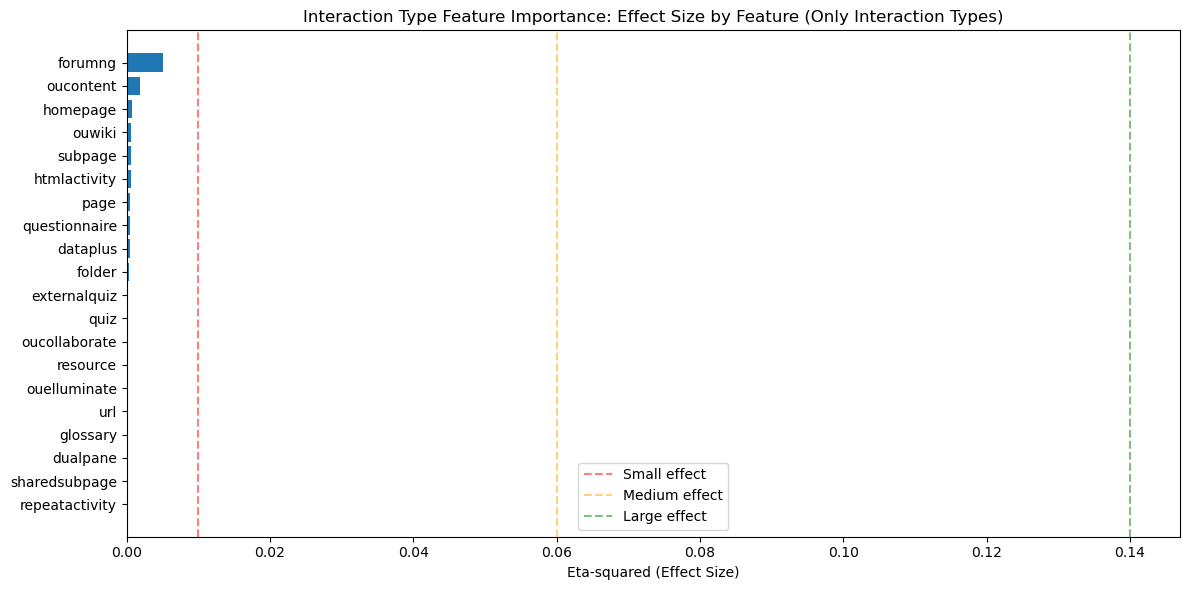

In [14]:
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values('eta_squared')
plt.barh(results_df_sorted['feature'], results_df_sorted['eta_squared'])
plt.xlabel('Eta-squared (Effect Size)')
plt.title('Interaction Type Feature Importance: Effect Size by Feature (Only Interaction Types)')
plt.axvline(x=0.01, color='r', linestyle='--', alpha=0.5, label='Small effect')
plt.axvline(x=0.06, color='orange', linestyle='--', alpha=0.5, label='Medium effect')
plt.axvline(x=0.14, color='g', linestyle='--', alpha=0.5, label='Large effect')
plt.legend()
plt.tight_layout()
plt.show()

Bar plot of mutual information:

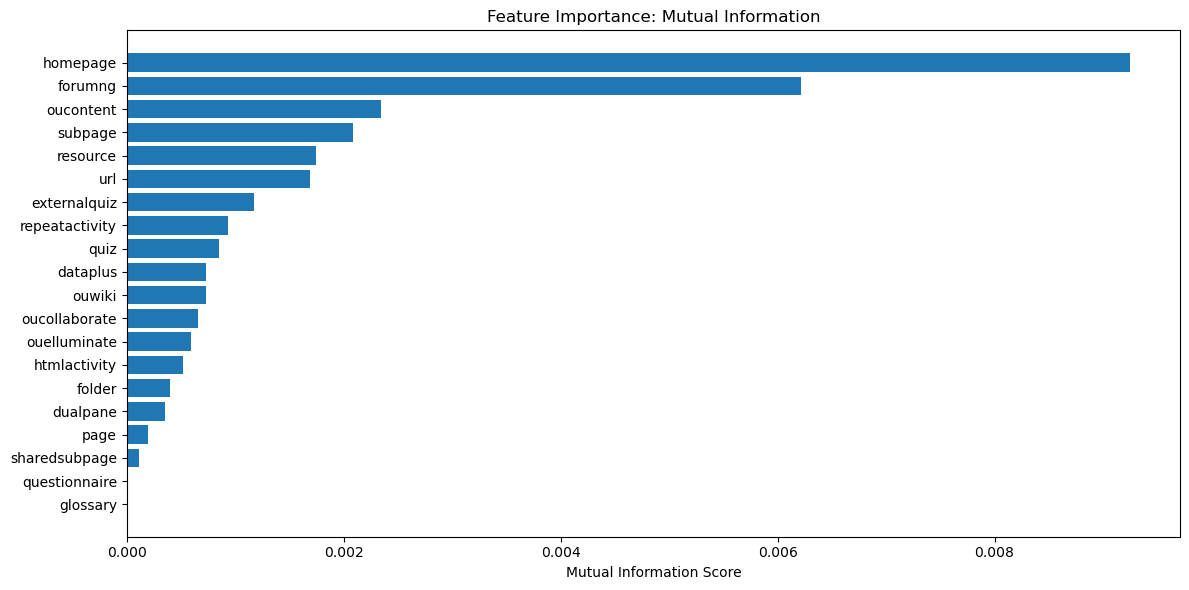

In [21]:
plt.figure(figsize=(12, 6))
mi_sorted = mi_df.sort_values('mutual_info')
plt.barh(mi_sorted['feature'], mi_sorted['mutual_info'])
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance: Mutual Information')
plt.tight_layout()
plt.show()

Combined comparison plot:

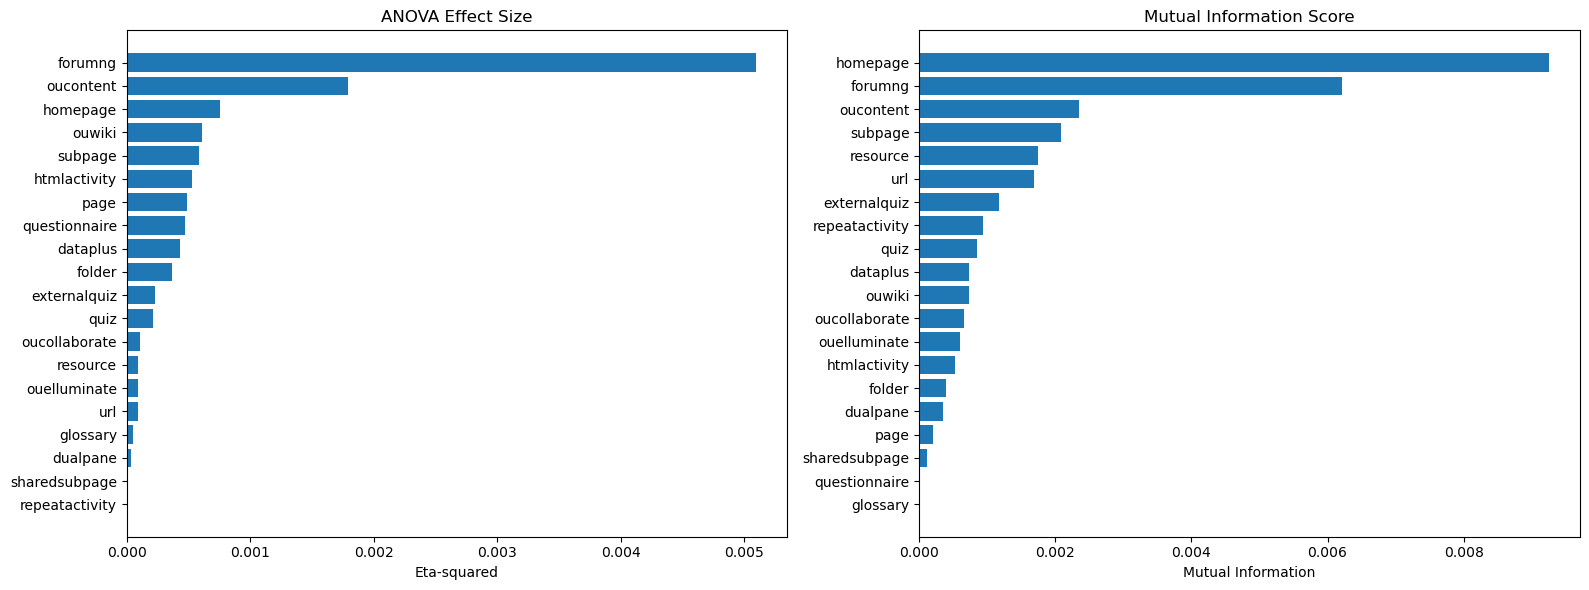

In [23]:
# Combined comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Eta-squared
axes[0].barh(results_df_sorted['feature'], results_df_sorted['eta_squared'])
axes[0].set_xlabel('Eta-squared')
axes[0].set_title('ANOVA Effect Size')

# Mutual Information
mi_sorted = results_df.sort_values('mutual_info')
axes[1].barh(mi_sorted['feature'], mi_sorted['mutual_info'])
axes[1].set_xlabel('Mutual Information')
axes[1].set_title('Mutual Information Score')

plt.tight_layout()
plt.show()

Heatmap of means by category:

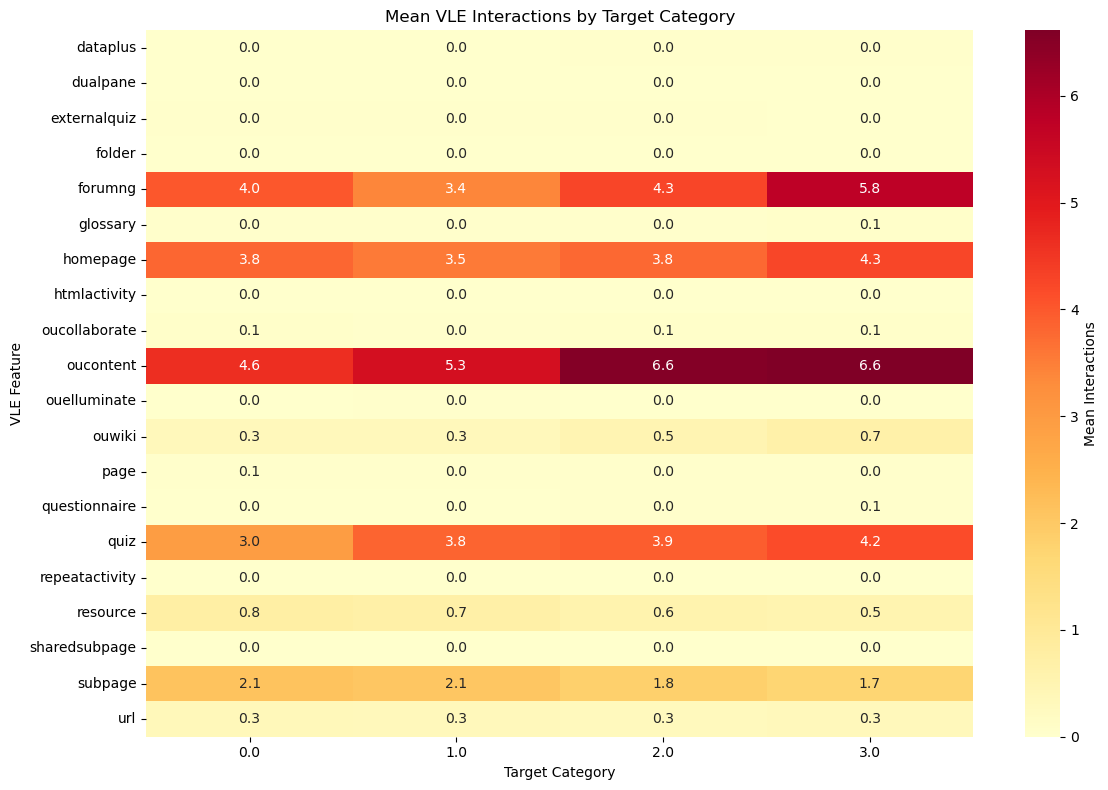

In [25]:
# Create pivot table of means
means_pivot = df.groupby('final_result')[vle_columns].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(means_pivot.T, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Mean Interactions'})
plt.xlabel('Target Category')
plt.ylabel('VLE Feature')
plt.title('Mean VLE Interactions by Target Category')
plt.tight_layout()
plt.show()

Box plots for top features:

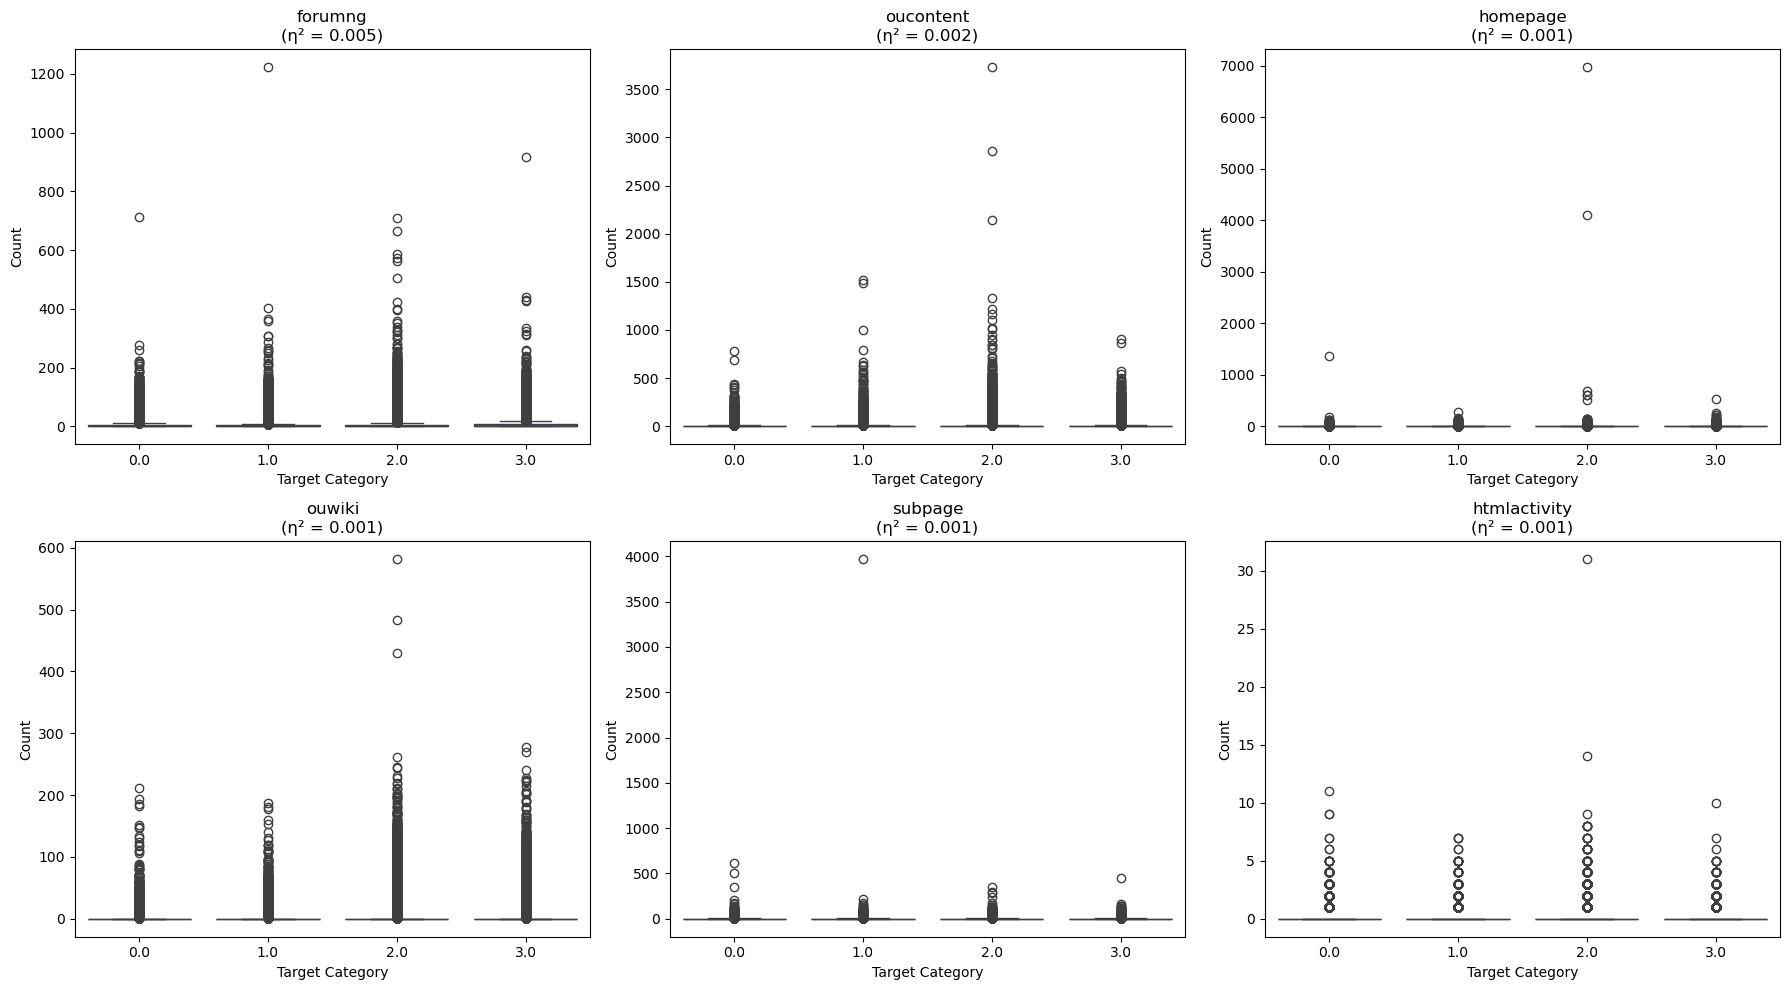

In [27]:
# Select top 6 features by eta-squared
top_features = results_df.nlargest(6, 'eta_squared')['feature'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    sns.boxplot(x='final_result', y=feature, data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature}\n(η² = {results_df[results_df["feature"]==feature]["eta_squared"].values[0]:.3f})')
    axes[idx].set_xlabel('Target Category')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

Correlation heatmap (features + target):

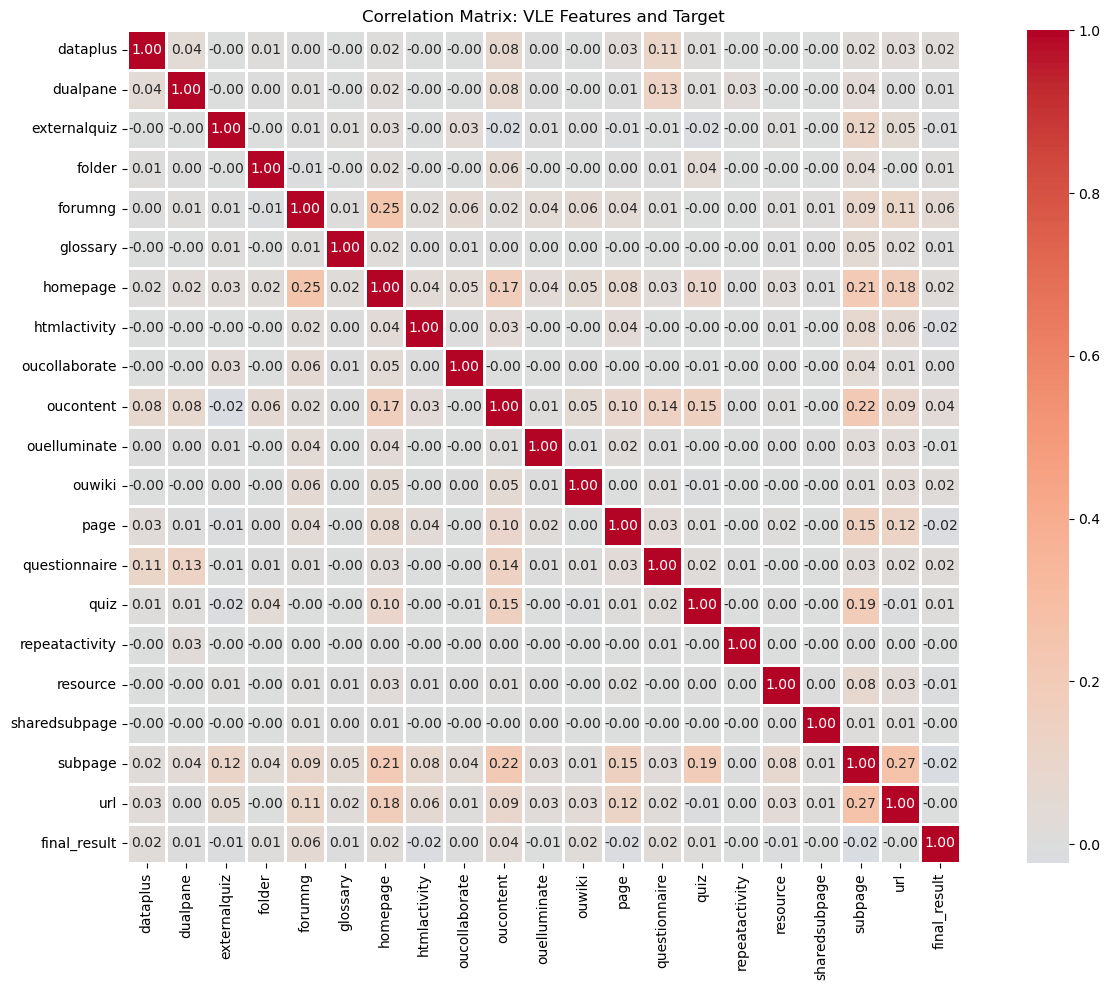


Pearson correlations with target (for reference):
subpage          -0.023597
htmlactivity     -0.017961
page             -0.017019
externalquiz     -0.012943
resource         -0.009431
ouelluminate     -0.006967
url              -0.004264
sharedsubpage    -0.003420
repeatactivity   -0.001693
oucollaborate     0.004104
dualpane          0.006187
glossary          0.006702
folder            0.009122
quiz              0.013223
homepage          0.019190
dataplus          0.020425
questionnaire     0.020985
ouwiki            0.023852
oucontent         0.038144
forumng           0.056454
Name: final_result, dtype: float64


In [29]:
# For visualization, temporarily encode target as numeric for correlation
df_temp = df[vle_columns + ['final_result']].copy()

plt.figure(figsize=(14, 10))
correlation_matrix = df_temp.corr()

# Highlight the target column
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix: VLE Features and Target')
plt.tight_layout()
plt.show()

# Extract just correlations with target
target_corrs = correlation_matrix['final_result'].drop('final_result').sort_values()
print("\nPearson correlations with target (for reference):")
print(target_corrs)